In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def normalized (x):
    minimum = np.min(x, axis = 0 )
    maximum = np.max(x, axis = 0 )
    return np.array([(x[i,:] - minimum)/(maximum - minimum) for i in range(len(x))])

In [2]:
# Formatting data
df= pd.read_excel('Data_new_21.xlsx', columns = ['Date & Time','FI_C771J1.PV','FI_C771J2.PV','HC_C771L.OP','HC_C771J1.OP','TI_C771T11.PV','TI_C771T21.PV','TI_C771T31.PV','TI_C771T41.PV','TI_C771T51.PV','TI_C771T61.PV','VI_C771X11.PV','VI_C771X21.PV','VI_C771W11.PV','VI_C771W21.PV','VI_C771V11.PV','VI_C771V21.PV','VI_C771U11.PV','VI_C771U21.PV','PI_C771C2.PV','PI_C771H.PV','IT_C771F'])
X = (np.array(df.fillna(0))[:,1:-1])
data = normalized(X)
y = df['y']

In [3]:
# Train model
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3)
lm = linear_model.LogisticRegression()
model = lm.fit(X_train, y_train)
prediction = lm.predict(X_test)
print('Score: ', model.score(X_test, y_test)*100)

Score:  98.82621454189761


c:\users\karli\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


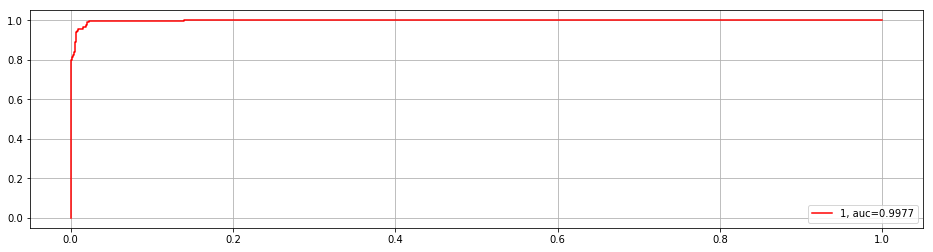

In [4]:
# Estimation
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)

y_pred_proba = lm.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba[:,1])
auc = metrics.roc_auc_score(y_test, y_pred_proba[:,1])

plt.figure(figsize=(16,4))
plt.plot(fpr,tpr,'r', label="1, auc="+str(round(auc,4)))
plt.grid()
plt.legend(loc=4)
plt.show()